## Final Project Submission

**Please fill out:
* Student name:  Victor Kabui Karanja
* Student pace: part time
* Scheduled project review date/time: 10/11/2022
* Instructor name: Rose, Noah
* Blog post URL:**


# Microsoft Movie Analysis

**# Overview**

**# Business Problem**

Microsoft wills to venture into the movie creation sector to increase the scope of their services to the public, this would bring in more revenue by creating traffic on their movie studio. Below I use the data from imdb and other sources to analyse the best type of films for them by checking on ratings, reviews and the budgets for each film

**# Data Understanding**

In [1]:
#importing the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
#Assigning the csv files of the files to use in the analysis
title_basic = pd.read_csv('./zippedData/imdb.title.akas.csv.gz')
title_ratings = pd.read_csv('./zippedData/imdb.title.ratings.csv.gz')
moviegros = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')

*IMDB TITLE BASICS FILE*

In [3]:
title_basic.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [4]:
title_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [5]:
#finding the missing values in the dataset
title_basic.isna().sum()

title_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

In [6]:
percent_missing = (title_basic.isna().sum())/3317.03
percent_missing

title_id              0.000000
ordering              0.000000
title                 0.000000
region               16.066481
language             87.423991
types                49.217523
attributes           95.500493
is_original_title     0.007537
dtype: float64

In [7]:
title_basic['language'].value_counts().head(7)

en     22895
tr      3847
bg      3609
fr      3576
he      2680
sv       965
cmn      727
Name: language, dtype: int64

With the high percentage of attributes missing from the dataset (almost all movies in the dataset don't have the attribute filed in) It would be advisable to drop it.

In [8]:
title_basic.describe()

,ordering,is_original_title
count,331703.000000,331678.000000
mean,5.125872,0.134769
std,6.706664,0.341477
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,6.000000,0.000000
max,61.000000,1.000000


*IMDB TITLE RATINGS FILE*

In [9]:
#previewing the dataset
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [69]:
#replace the tconst with title_id in title_ratings
title_ratings.rename(columns = {'tconst':'title_id'}, inplace=True)
title_ratings.head()

,title_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [11]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [12]:
title_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


The title ratings had no null values, all the information was filled in and in the required format
There was a maximum average rating of 10 given in the dataset and a minimum rating of 1
From the mean and the percentile distribution, the majority of the rating was above 5

*BOM MOVIE GROSS FILE*

In [13]:
moviegros.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [14]:
moviegros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [15]:
moviegros.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [16]:
#Determine the percentage (%)of missing values
percent_missing = (moviegros.isna().sum())/33.87
percent_missing

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

# Data Preparation

**Data Cleaning**

*IMDB TITLE BASICS*

In [50]:
title_basic.drop(columns=['attributes', 'language'], inplace=True)

In [51]:
title_basic.duplicated(subset=None, keep= 'first').sum()

0

In [52]:
title_basic['types'] = title_basic['types'].fillna(title_basic['types'].mode()[0], axis=0)

In [53]:
title_basic['region'] = title_basic.region.fillna(title_basic.region.mode()[0], axis=0)
title_basic.head()

,title_id,ordering,title,region,types,is_original_title
0,tt0369610,10,Джурасик свят,BG,imdbDisplay,0.0
1,tt0369610,11,Jurashikku warudo,JP,imdbDisplay,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,imdbDisplay,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,imdbDisplay,0.0
4,tt0369610,14,Jurassic World,FR,imdbDisplay,0.0


In [54]:
title_basic['is_original_title'] = title_basic['is_original_title'].fillna(title_basic['is_original_title'].mode()[0])

In [55]:
title_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             331703 non-null  object 
 4   types              331703 non-null  object 
 5   is_original_title  331703 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 15.2+ MB


In [56]:
title_basic.describe()

,ordering,is_original_title
count,331703.000000,331703.000000
mean,5.125872,0.134759
std,6.706664,0.341467
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,6.000000,0.000000
max,61.000000,1.000000


on comparing the describe before and after the data has not drifted by an alarming margin

Text(0.5, 1.0, 'Boxplot of Ordering from the IMDB title basic dataset')

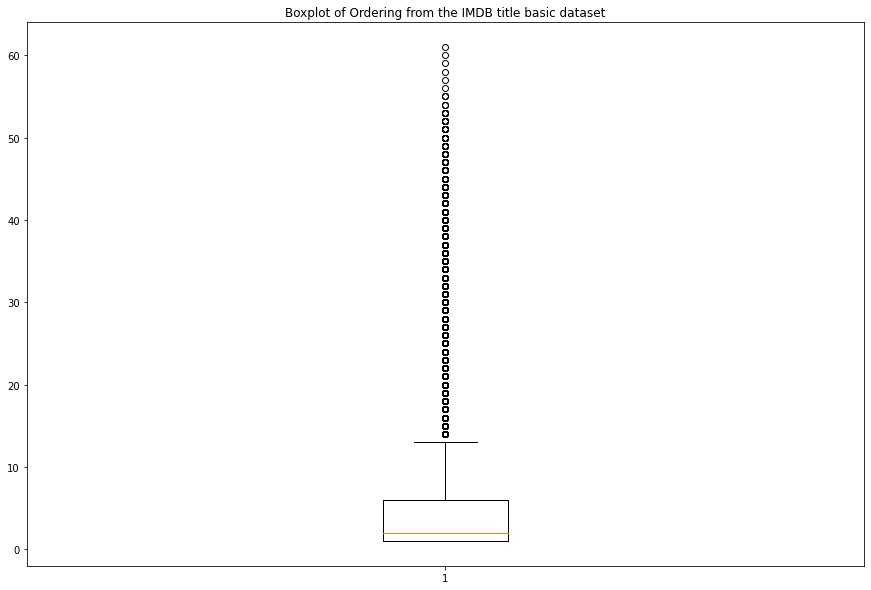

In [80]:
fig, ax = plt.subplots(figsize=(15,10))
ax.boxplot(title_basic['ordering'])
plt.title('Boxplot of Ordering from the IMDB title basic dataset')

*Title Ratings*

In [71]:
title_ratings.duplicated(subset='title_id', keep='first').sum()

0

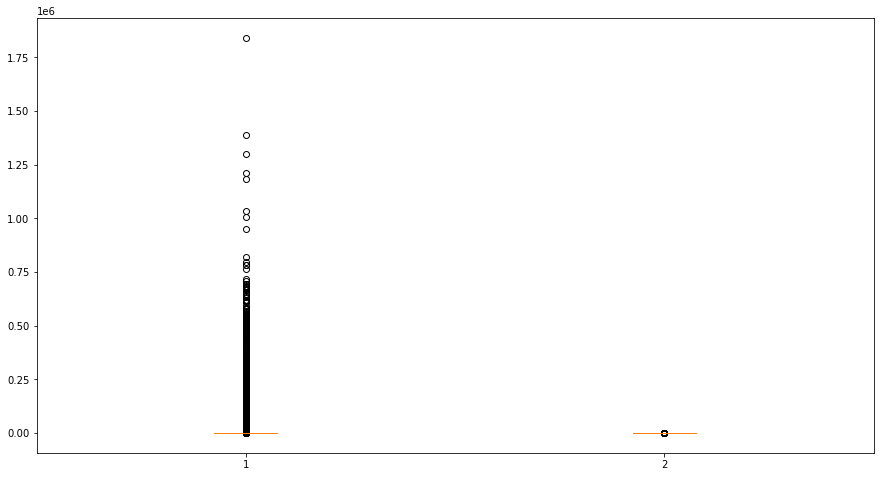

In [63]:
#identify outliers using a boxplot
fig, ax=plt.subplots(figsize=(15,8))
data = title_ratings['numvotes'], title_ratings['averagerating']
ax.boxplot(data)
plt.show()

*bom movie gross*

In [73]:
moviegros.duplicated(subset='title', keep='first').sum()

1

In [74]:
moviegros.drop_duplicates(subset='title', keep='first', inplace=True)

In [75]:
moviegros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3386 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3386 non-null   object 
 1   studio          3381 non-null   object 
 2   domestic_gross  3358 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3386 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 158.7+ KB


In [87]:
moviegros['studio'].fillna(moviegros['studio'].mode()[0],inplace=True)
moviegros.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [88]:
moviegros['domestic_gross'].fillna(moviegros['domestic_gross'].mean(), inplace=True)

In [101]:
moviegros['foreign_gross'].fillna(moviegros['foreign_gross'].mode()[0], inplace=True)

In [106]:
moviegros.foreign_gross.astype(str).astype(int)

ValueError: invalid literal for int() with base 10: '1,131.6'

**Merging Datasets**

# Analysis

# Conclusion

# Recommendation